# Section 42: Tuning Neural Networks

- 10/22/20
- online-ds-ft-070620

> NOTE: YOU MAY **NOT** USE THE FUNCTIONS FROM THIS NOTEBOOK IN YOUR PROJECTS

## Learning Objectives

- Discuss the different options available for tuning neural networks
- Discuss some rules of thumb for tuning Neural Networks

- **ACTIVITY: Use a computer vision task to walk-through hyperparameter tuning (cats vs dogs)**
    - [Zip File on Google Drive](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)

- **Learn how to use GridSearchCV with Keras neural neural networks.**

    - Learn how to examine the other parameter results from a GridSearchCV object.

    - Learn how to create your own custom scorer for sklearn (and why you'd want to)
- Learn how to set up email notifications via Python (for gridsearch results)


## Questions/Comments?
- Is the workflow in the lab fairly typical?  Why is gridsearch not a good choice for hyperparameter tuning?


## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

# Overview  - Neural Network Tuning 

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### Dealing with Bias/Variance

- Balancing Bias/Variance:
    - High Bias models are **underfit**
    - High Variance models are **overfit**



- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is roughly laid out in order of importance/what-to-tune-first
    - [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters (For Dense layers)

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons


7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout

### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categorical cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- **can also uses custom scoring functions**

## Using Regularization

### L1 & L2 Regularlization
- These methods of regularizaiton do so by penalizing coefficients(regression) or weights(neural networks),
    - L1 & L2 exist in regression models as well. There, L1='Lasso Regressions' , L2='Ridge regression'
    
    

- **L1 & L2 regularization add a term to the cost function.**

$$Cost function = Loss (say, binary cross entropy) + Regularization term$$

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$
- where $\lambda$ is the regularization parameter. 

- **The difference between  L1 vs L2 is that L1 is just the sum of the weights whereas L2 is the sum of the _square_of the weights.**  


<br><br>
- **L1 Regularization:**
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||$$
    - Uses the absolute value of weights and may reduce the weights down to 0. 
    
        
- **L2 Regularization:**:
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||^2$$
    - Also known as weight decay, as it forces weights to decay towards zero, but never exactly 0.. 

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

### Additional Options

#### Dropout 

#### Early Stopping

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


# Activity: Dogs vs Cats

- Build an image classification model to detect cats vs dogs

## Installs, Imports, & Functions

In [63]:
# !pip install -U imageio
# !pip install -U scikit-image

# !pip install pillow
# !pip install opencv-contrib-python
# !pip install -U tensorflow

In [64]:
# !pip install -U fsds
from fsds.imports import *

In [65]:
from skimage.transform import resize
from imageio import imread
from PIL import Image

# import cv2
# from tqdm import tqdm

## Loading in the data

- Download the zip file 
    - [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- Extract zip file contents to the a folder on your computer.
    - I am using my user folder > Datasets > cats-vs-dogs
    

In [66]:
import os,glob
# print(os.path.abspath(os.curdir))

In [67]:
# change dataset_folder to match where you stored the files
base_folder ="/Users/jamesirving/Datasets/dogs-vs-cats-sorted/" #"/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"

## Check contents of base folder
os.listdir(base_folder)

['single_prediction', '.DS_Store', 'Models', 'training_set', 'test_set']

In [68]:
## Define train_folder and test_folder

train_folder = base_folder+"training_set/"
test_folder =  base_folder+"test_set/"

## Check contents of train_folder
os.listdir(test_folder)

['dogs', 'cats', '.DS_Store', 'example_save.jpg']

### Using ImageDataGenerator.flow_from_directory

In [69]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


> Train-Test-Val Split: https://medium.com/@olagokeibrahim165/split-train-data-into-training-and-validation-when-using-imagedatagenerator-in-keras-ffdc88bbf6f3

In [70]:
## get num images
import os,glob
def get_num_images(train_folder,folders=['dogs','cats'],verbose=True):
    """Gets the total number of images from all folders listed"""
    num_images = 0
    for folder in folders:
        num_in_folder = len(os.listdir(train_folder+folder))
        
        if verbose:
            print(f"- There are {num_in_folder} images in {folder} folder.")
        num_images+=num_in_folder
    return num_images

In [71]:
## Get the Number of total images for batch size 
BATCH_SIZE_TRAIN = get_num_images(train_folder)
BATCH_SIZE_VAL_TEST = get_num_images(test_folder)
print(f"Training images: {BATCH_SIZE_TRAIN}")
print(f"Test & Val images: {BATCH_SIZE_VAL_TEST}")

## Make validation split
VAL_SPLIT = 0.2
BATCH_SIZE_VAL = round(BATCH_SIZE_VAL_TEST*VAL_SPLIT)
BATCH_SIZE_TEST = round(BATCH_SIZE_VAL_TEST*(1-VAL_SPLIT))

BATCH_SIZE_TRAIN,BATCH_SIZE_TEST,BATCH_SIZE_VAL

- There are 4001 images in dogs folder.
- There are 4001 images in cats folder.
- There are 1001 images in dogs folder.
- There are 1001 images in cats folder.
Training images: 8002
Test & Val images: 2002


(8002, 1602, 400)

In [72]:
## MAKING IMAGE DATA GENERATORS FOR TRAIN TEST VAL
IMG_SIZE = (64,64)

## Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,)
#                                    shear_range = 0.2, zoom_range = 0.2,
#                                    horizontal_flip = True)
test_val_datagen = ImageDataGenerator(rescale=1./255,validation_split=VAL_SPLIT)


In [73]:
## Make Training Sets With All Images
training_set_full = train_datagen.flow_from_directory(train_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=BATCH_SIZE_TRAIN)                                          
                                                      

test_set_full = test_val_datagen.flow_from_directory(test_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=BATCH_SIZE_TEST,
                                                    subset='training')  

val_set_full = test_val_datagen.flow_from_directory(test_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=BATCH_SIZE_VAL,
                                                    subset='validation')  

Found 8000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [74]:
## MAKE X and YS FROM GENERATORS
X_train, y_train  = next(training_set_full)
X_train.shape

(8000, 64, 64, 3)

In [75]:
y_train

array([1., 1., 1., ..., 0., 1., 1.], dtype=float32)

In [76]:
training_set_full.class_indices

{'cats': 0, 'dogs': 1}

In [77]:
# TEST AND VAL SETS
X_test, y_test = next(test_set_full)
X_val,y_val = next(val_set_full)

In [78]:
## check train shape
X_train.shape

(8000, 64, 64, 3)

In [79]:
## UNROW IMAGES FOR SEQUENTIAL MODEL
X_train_unrow = X_train.reshape( X_train.shape[0],-1)
X_train_unrow.shape


(8000, 12288)

In [80]:
X_test_unrow = X_test.reshape( X_test.shape[0],-1)
X_val_unrow = X_val.reshape( X_val.shape[0],-1)


0.0

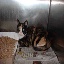

In [81]:
## Display random image 
import numpy as np
i = np.random.choice(range(len(y_train)))
display(y_train[i])
display(array_to_img(X_train[i]))#.reshape(32,32,3)))

# Using Dense Networks

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras import models,layers,optimizers,regularizers,activations
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout

In [83]:
y_train

array([1., 1., 1., ..., 0., 1., 1.], dtype=float32)

In [84]:
X_train_unrow.shape

(8000, 12288)

In [85]:
arr = np.array([0,1,2])
arr.shape

(3,)

In [86]:
##N Sequential model: 64 units, relu, final=dense 1, sigmoid
model_1 = Sequential()
model_1.add(Dense(64,activation='relu',input_shape=(X_train_unrow.shape[1],)))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',optimizer='adam',
                metrics=['accuracy',tf.metrics.Recall()])
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 786,561
Trainable params: 786,561
Non-trainable params: 0
_________________________________________________________________


In [87]:
## Fit Model with 20 epochs
history = model_1.fit(X_train_unrow,y_train, epochs=20,
                      validation_data=(X_val_unrow,y_val))

Epoch 1/20
250/250 [==============================] - 1s 5ms/step - loss: 0.8426 - accuracy: 0.5299 - recall_1: 0.5295 - val_loss: 0.7567 - val_accuracy: 0.5575 - val_recall_1: 0.2300
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.7583 - accuracy: 0.5600 - recall_1: 0.5617 - val_loss: 0.8112 - val_accuracy: 0.5350 - val_recall_1: 0.0900
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.7104 - accuracy: 0.5680 - recall_1: 0.5655 - val_loss: 0.6699 - val_accuracy: 0.5625 - val_recall_1: 0.4050
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6798 - accuracy: 0.5878 - recall_1: 0.5925 - val_loss: 0.6665 - val_accuracy: 0.5725 - val_recall_1: 0.6600
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6585 - accuracy: 0.6079 - recall_1: 0.6062 - val_loss: 0.7125 - val_accuracy: 0.5550 - val_recall_1: 0.1600
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6514

In [88]:
## Get History  as adf
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1
0,0.842623,0.529875,0.52950,0.756682,0.5575,0.230
1,0.758294,0.560000,0.56175,0.811230,0.5350,0.090
2,0.710387,0.568000,0.56550,0.669858,0.5625,0.405
3,0.679792,0.587750,0.59250,0.666526,0.5725,0.660
4,0.658493,0.607875,0.60625,0.712543,0.5550,0.160
5,0.651412,0.618375,0.62625,0.682435,0.5675,0.645
6,0.652435,0.619375,0.61550,0.681030,0.5650,0.775
7,0.638044,0.629875,0.64750,0.669885,0.5900,0.615
8,0.639711,0.627125,0.62950,0.665004,0.5925,0.665
9,0.628153,0.639375,0.64850,0.723516,0.5550,0.220


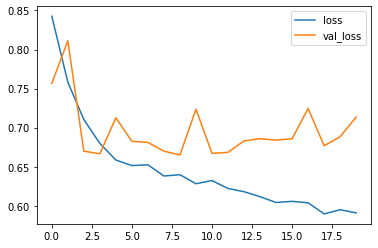

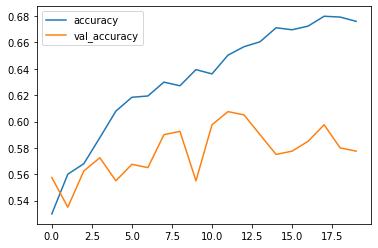

In [92]:
## PLotn all fo the metrics in history
metric_list=['loss','acc']

for metric in metric_list:
    history_df[[col for col in history_df.columns if metric in col]].plot()

In [94]:
## Get PRedictions
y_hat_test = model_1.predict(X_test_unrow).round()
y_hat_test

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [95]:
## Classification Report
from sklearn import metrics
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

         0.0       0.71      0.40      0.51       800
         1.0       0.58      0.83      0.69       800

    accuracy                           0.62      1600
   macro avg       0.64      0.62      0.60      1600
weighted avg       0.64      0.62      0.60      1600



In [96]:
training_set_full.class_indices

{'cats': 0, 'dogs': 1}

### Functionize Model Creation & Plotting

In [97]:
## def make_model
def make_model(verbose=True):
    model_1 = Sequential()
    model_1.add(Dense(64,activation='relu',input_shape=(X_train_unrow.shape[1],)))
    model_1.add(Dense(1, activation='sigmoid'))

    model_1.compile(loss='binary_crossentropy',optimizer='adam',
                    metrics=['accuracy',tf.metrics.Recall()])
    if verbose:
        model_1.summary()
    return model_1

In [98]:
def plot_history(history, metric_list=['loss','acc']):
    ## Get History  as adf
    history_df = pd.DataFrame(history.history)
    ## PLotn all fo the metrics in history
   
    for metric in metric_list:
        history_df[[col for col in history_df.columns if metric in col]].plot()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                786496    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 786,561
Trainable params: 786,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 1s 5ms/step - loss: 0.9049 - accuracy: 0.5234 - recall_2: 0.5235 - val_loss: 0.9561 - val_accuracy: 0.5100 - val_recall_2: 0.0300
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.7779 - accuracy: 0.5658 - recall_2: 0.5630 - val_loss: 0.8413 - val_accuracy: 0.5325 - val_recall_2: 0.9500
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.7728 - accuracy: 0.5631 - recall_2: 0.5598 - val_loss: 0.6729 - va

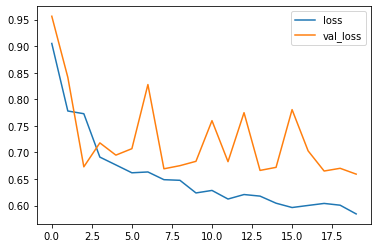

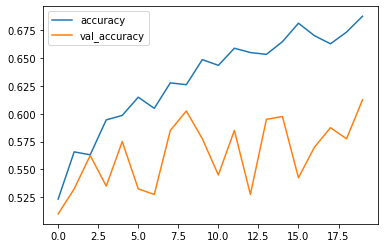

In [99]:
## Use new functions to make model and plot history
model_2 = make_model()
history = model_2.fit(X_train_unrow,y_train, epochs=20,
                      validation_data=(X_val_unrow,y_val))
plot_history(history)

### Combine the Whole Process Into One Func

In [104]:
def make_fit_plot_model(build_fn,fit_kws=dict(epochs=20)):
    ## Use new functions to make model and plot history
    model = build_fn()
    history = model.fit(X_train_unrow,y_train, **fit_kws,
                          validation_data=(X_val_unrow,y_val))
    plot_history(history)
    y_hat_test = model.predict(X_test_unrow).round()
    print(metrics.classification_report(y_test,y_hat_test))
    return model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                786496    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 786,561
Trainable params: 786,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 1s 5ms/step - loss: 0.8924 - accuracy: 0.5347 - recall_5: 0.5368 - val_loss: 0.6769 - val_accuracy: 0.5675 - val_recall_5: 0.6250
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.7496 - accuracy: 0.5624 - recall_5: 0.5592 - val_loss: 0.7596 - val_accuracy: 0.5275 - val_recall_5: 0.9350
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.6890 - accuracy: 0.5893 - recall_5: 0.5897 - val_loss: 0.6833 - va

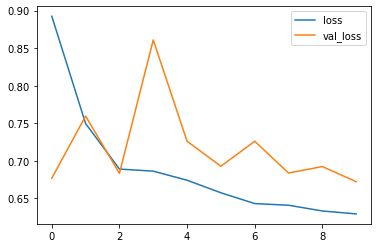

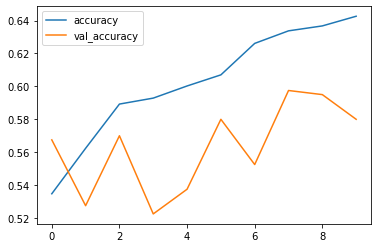

In [105]:
## Test out new function
model_2 =make_fit_plot_model(make_model,fit_kws={'epochs':10})

## Activity: Ok...so now what??

> Using the rules of thumb and your own knowledge/research, attempt several methods to improve the results of the model. 

In [106]:
## def make_model
def make_model2(verbose=True):
    model_1 = Sequential()
    model_1.add(Dense(64,activation='relu',input_shape=(X_train_unrow.shape[1],)))
    model_1.add(Dense(32, activation='relu'))
    model_1.add(Dense(1, activation='sigmoid'))

    model_1.compile(loss='binary_crossentropy',optimizer='adam',
                    metrics=['accuracy',tf.metrics.Recall()])
    if verbose:
        model_1.summary()
    return model_1

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                786496    
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 788,609
Trainable params: 788,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 1s 5ms/step - loss: 0.7348 - accuracy: 0.5380 - recall_6: 0.5430 - val_loss: 0.6816 - val_accuracy: 0.5600 - val_recall_6: 0.2600
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6851 - accuracy: 0.5849 - recall_6: 0.5828 - val_loss: 0.6780 - val_accuracy: 0.5750 - val_recall_6: 0.6700
Epoch 3/2

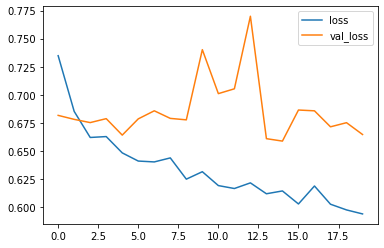

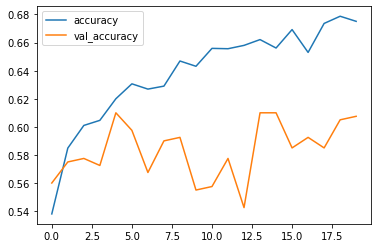

In [107]:
make_fit_plot_model(make_model2)

# APPENDIX/FOR TOMORROW

## HyperParameter Tuning with GridSearchCV & Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    

```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```    

2. We then create out model using the Keras wrapper:

```python
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

In [ ]:
# class Timer():
#     ## def init
#     def __init__(self,format_="%m/%d/%y - %I:%M %p"):
#         import tzlocal
#         self.tz = tzlocal.get_localzone()
#         self.fmt = format_
        
#         self.created_at = self.get_time()# get time
        
    
#     ## def get time method
#     def get_time(self):
#         import datetime as dt
#         return dt.datetime.now(self.tz)

#     ## def start
#     def start(self):
#         time = self.get_time()
#         self.start = time
#         print(f"[i] Timer started at{self.start.strftime(self.fmt)}")

        

#     ## def stop
#     def stop(self):
#         time = self.get_time()
#         self.end = time
#         print(f"[i] Timer ended at {self.end.strftime(self.fmt)}")
#         print(f"- Total time = {self.end-self.start}")

        
        
def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig



def plot_keras_history(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    """Plots keras history and returns fig"""
    ## Make a df from history
    plot_df = pd.DataFrame(history.history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


    ## Change xaxis locators 
    [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
    [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train_img[0].shape

In [ ]:
X_train_img.shape, y_train.shape

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

def create_checkpoint(monitor,model_subfolder=""):#='Datasets/Models/cat_vs_dog/'):
    filepath=model_subfolder+"weights-improvement-{epoch:02d}-{"+monitor+":.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_best_only=True, mode='max')
    return checkpoint

def create_early_stopping(monitor = 'val_accuracy',min_delta = 0.05, patience = 3,
                          verbose = 1, restore_best_weights = True):

    args = locals()
    earlystop = EarlyStopping(**args)
    return earlystop


def get_callbacks(early_stop_kws={}, checkpoint_kws={}):
    model_subfolder=base_folder+'Models/'
    os.makedirs(model_subfolder,exist_ok=True)

    callbacks_list = [create_checkpoint('val_accuracy',
                                        model_subfolder=model_subfolder,**checkpoint_kws),
                      create_early_stopping(**early_stop_kws)]
    return callbacks_list

In [ ]:
def make_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(make_model)
model

In [ ]:
## Fit baseline model
timer = Timer()

timer.start()
history = model.fit(X_train_img, y_train, epochs=100, batch_size=64, 
                      validation_data=(X_val_img, y_val))
timer.stop()

In [ ]:
history

In [ ]:
        
def evaluate_model(y_true, y_pred,history=None):
    """Evaluates neural network using sklearn metrics"""
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
#     try:    
    if history is not None:
        plot_keras_history(history)
#     except:
#         pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")

        
        

In [ ]:
y_hat_test = model.predict(X_test_img)

evaluate_model(y_test,y_hat_test,history)

In [ ]:
def make_fit_evaluate_model(build_fn, fit_params = dict(epochs=100,
                                                        batch_size=64)):
    model = build_fn()
    
    timer = Timer()
    model.summary()
    timer.start()
    
    history = model.fit(X_train_img, y_train,**fit_params,
                          validation_data=(X_val_img, y_val))
    timer.stop()
    
    y_hat_test = model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test,history)
    return model,y_hat_test

In [ ]:
fit_model,model_preds = make_fit_evaluate_model(make_model)

## APPENDIX/HOW-TOs:

## How to Make a Custom Scoring Function

1. **Why would you do this?**
    1. You may want to use a metric that isn't available in sklearn. 
        - In the included `my_custom_scorer` function, I take the accuracy of each class's predictions from the diagonal of a normalized confusion matrix. 
        - I then calculate the mean of those 3 class accuracies, which is the `score` that is returned to the gridsearch. 
        
    2. You may want to add a printout or display to the scoring function so you can see the results as the search is going.
<br><br>
2. **How do you do write your own?**
    1. Define your custom scoring function.
        - It must accept `y_true`,`y_pred`
        - It must return a value to maximize. (like accuracy)
    2. You can add print or display commands to have the scoring function report the current results as the gridsearch is still going.
        - If you combine this with the example `create_model` function above that includes the `vars=locals(); print(vars)` command, then gridsearch will display:
            1. the parameters of each model (each time the `create_model` function is called.
            2. The score of each model, including a confusion matrix figure (each time it calls `my_custom_scorer`).
        
```python
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    ## Flatten one-hot encoded target columns into 1 column for sklearn functions
    if y_true.ndim>1 or y_pred.ndim>1:
        
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
     # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    
    # Get the mean of the diagonal values
    score = np.mean(diag)
    
    ## Display Results for the User
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot the confusion matrix.
    ji.plot_confusion_matrix(cm,normalize=True)

    # return the score 
    return score
```        
        
        
3. **How do you use it?**
    - When instantiating GridSearchCV pass your function as the `scoring=` parameter, wrapped in the  `sklearn.metrics.make_scorer` function.
  

```python
## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_test,
                   scoring=make_scorer(my_custom_scorer))
                    
grid_result = grid.fit(X_train, y_train)
```